In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.covariance import EllipticEnvelope
from matplotlib import cm

In [ ]:
def ReadData(datasetName):
    all_data=pd.read_csv(datasetName)
    print(all_data.shape)
    all_data.head()
    return all_data

In [ ]:
def trainDataset(all_data):
    train=all_data.iloc[:40000,1:3]
    print(train.shape)
    train.head()
    x=train.values
    plt.scatter(x[:,0],x[:,1])
    #plt.xlabel('Kill')
    #plt.ylabel('Walk')
    return train

In [ ]:
def cluster_elliptic(train):
  clf = EllipticEnvelope(contamination=0.01,random_state=0)
  clf.fit(train)
  ee_scores = pd.Series(clf.decision_function(train)) 
  ee_predict = clf.predict(train)
  ee_anomalies = train.iloc[ee_predict==-1]
  print(ee_anomalies)
  cmap=np.array(['white','red'])
  plt.scatter(train.iloc[:,0],train.iloc[:,1],c='white',s=20,edgecolor='k')
  plt.scatter(ee_anomalies.iloc[:,0],ee_anomalies.iloc[:,1],c='red',marker='x',s=10)
  plt.title('Elliptic Envelope')
 # plt.xlabel('Kill')
 # plt.ylabel('Walk')
  return ee_predict

(87898, 3)
(40000, 2)


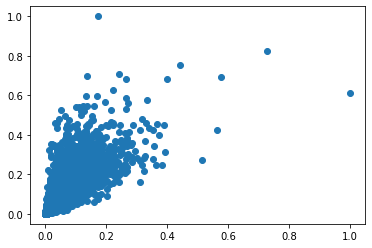

In [ ]:
all_data=ReadData('/content/drive/MyDrive/Thesis_PUBG/Kill_Walk.csv')
train=trainDataset(all_data)

       solo_Kills  solo_WalkDistance
24       0.187127           0.152447
25       0.188573           0.178250
40       0.173748           0.157118
60       0.169770           0.391480
94       0.214789           0.269941
...           ...                ...
39125    0.145543           0.162651
39289    0.256373           0.336062
39380    0.199964           0.389170
39811    0.037968           0.458820
39894    0.323811           0.215913

[400 rows x 2 columns]


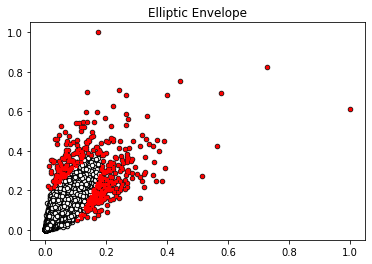

In [ ]:
ee_predict=cluster_elliptic(train)

In [ ]:
from sklearn.metrics import silhouette_score
print(f'Silhouette Score: {silhouette_score(train, ee_predict)}')

Silhouette Score: 0.8026630510456989


(87898, 3)
(40000, 2)


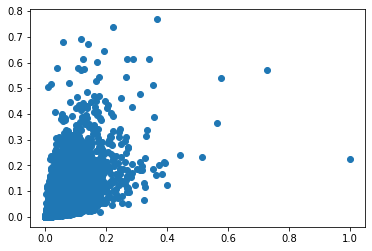

In [ ]:
all_data=ReadData('/content/drive/MyDrive/Thesis_PUBG/Kill_Ride.csv')
train=trainDataset(all_data)

       solo_Kills  solo_RideDistance
16       0.076840           0.207347
24       0.187127           0.290187
40       0.173748           0.290743
50       0.118423           0.338483
53       0.113361           0.302961
...           ...                ...
37955    0.137588           0.486367
38463    0.183511           0.271354
38667    0.064003           0.386083
39289    0.256373           0.186139
39894    0.323811           0.064613

[400 rows x 2 columns]


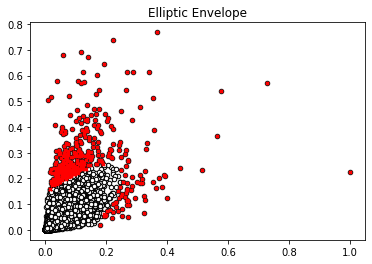

In [ ]:
ee_predict=cluster_elliptic(train)

In [ ]:
print(f'Silhouette Score: {silhouette_score(train, ee_predict)}')

Silhouette Score: 0.8461880899841439


(87898, 3)
(40000, 2)


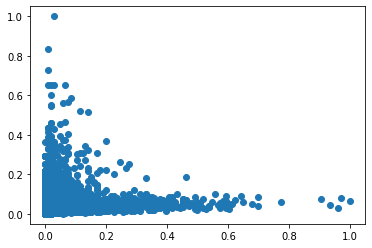

In [ ]:
all_data=ReadData('/content/drive/MyDrive/Thesis_PUBG/Headshots.csv')
train=trainDataset(all_data)

       solo_Wins  solo_HeadshotKillsPg
16      0.358491              0.036364
24      0.452830              0.074182
25      0.594340              0.066182
32      0.415094              0.051636
40      0.462264              0.071273
...          ...                   ...
39687   0.018868              0.339636
39857   0.000000              0.218182
39891   0.009434              0.218182
39942   0.056604              0.375273
39998   0.009434              0.218182

[400 rows x 2 columns]


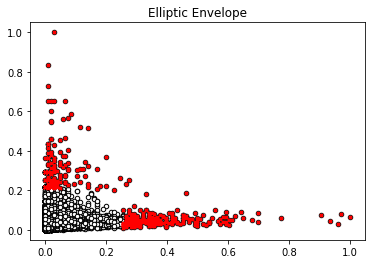

In [ ]:
ee_predict=cluster_elliptic(train)

In [ ]:
print(f'Silhouette Score: {silhouette_score(train, ee_predict)}')

Silhouette Score: 0.8603852978065861
